# Does everyone think they are middle class?
**Benjamin T. Vincent**

An article in the Guardian by [@philipoltermann](https://twitter.com/philipoltermann), entitled [German voters’ view of personal wealth causes problems for the left](https://www.theguardian.com/world/2021/may/26/german-voters-view-of-personal-wealth-causes-problems-for-the-left), reported on a research study claiming that everyone sees themselves as middle class. The core result was portrayed in this figure:

![guardian](img/guardian.png)

It seems blindingly obvious from this data that rich people underestimate their income and poor people overestimate their income. But is this really the case?

On twitter, I saw a post by [Sam Schwarzkopf
](https://twitter.com/sampendu) pointing to a [blog post](https://neuroneurotic.net/2021/05/28/its-ing-everywhere/) he wrote showing that the basic effect can be reproduced purely as a statistical artifact.

Alarm bells rang! This is basically the same situation that played out with the [Dunning-Kruger effect](https://en.wikipedia.org/wiki/Dunning%E2%80%93Kruger_effect) a few months back. The claim made here is that people with high cognitive abilities underestimate themselves, whereas people with low cognitive abilities overestimate themselves. This had previously come under fire for being a statistical artifact in a [blog post](https://www.mcgill.ca/oss/article/critical-thinking/dunning-kruger-effect-probably-not-real) by [Jonathan Jarry](https://twitter.com/crackedscience). But I didn't think this was quite right, and I wrote about it in a post called [The Dunning-Kruger effect proably is real](https://drbenvincent.medium.com/the-dunning-kruger-effect-probably-is-real-9c778ffd9d1b).

In that post, I argued that the Dunning-Kruger effect was 'real' in that the empirical results are correct, even if the interpretation is not. It turns out that the basic effect of people at the high end underestimating and people at the low end over-estimating is not just a statistical artifact.

This effect can be accounted for by the 'noise + bias' model - this models people as having uncertainty in their cognitive abilities, income, or whatever, but also have a degree of bias. Importantly, the bias in this model is the same for all people.

![noise+bias model](img/model_eq.png)

> A noise + bias model of a participant p where subjective assessment of ability is a noisy measurement of true ability, x. The objective measure of ability, o, is a noisy measurement of true ability, and the subjective/self-estimate of ability, s, is a noisy estimate of the true ability plus bias.

If you are interested, go read my [The Dunning-Kruger effect proably is real](https://drbenvincent.medium.com/the-dunning-kruger-effect-probably-is-real-9c778ffd9d1b) post for more info.

In this post, I will show how the same model can account for these German income perception results. 

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

In [2]:
%load_ext lab_black
%config InlineBackend.figure_format = 'retina'
plt.rcParams.update({"font.size": 14})

In [3]:
deciles = [10, 20, 30, 40, 50, 60, 70, 80, 90]
groups = np.arange(1, 10 + 1)

Simulate a little world of 1 million people. Each person is somewhere on the income scale, $x$. We take an objective, but noisy, measurement of their true income $o$. And we ask each person for their own subjective assessment of their income $s$. This subjective self-assessment is noisy (each person has uncertainty) and has some level of bias.

In [4]:
def generate_data(N=1_000_000, bias=0, σo=1, σs=1):
    # true ability
    x = norm.rvs(size=N)
    # objective measure of ability
    o = x + norm.rvs(loc=0, scale=σo, size=N)
    # subjective measure of ability
    s = x + bias + norm.rvs(loc=0, scale=σs, size=N)
    # group participants into deciles based on objective measure
    q = np.digitize(o, np.percentile(o, deciles)) + 1
    return (x, o, s, q)

In [5]:
def plot(ax, title):

    for o, s in zip(o_mean, s_mean):
        ax.plot([0, 1], [o, s], c="crimson", lw=3)
        ax.plot([0], [o], "o", c="crimson", ms=7)
        ax.plot([1], [s], "o", c="crimson", mfc="w", ms=7)

    ax.set(
        xticks=[0, 1],
        xticklabels=["Actual", "Percieved"],
        xlabel="Income",
        yticks=np.linspace(0, 100, 11),
        title=title,
    )

    ax.grid(axis="y")

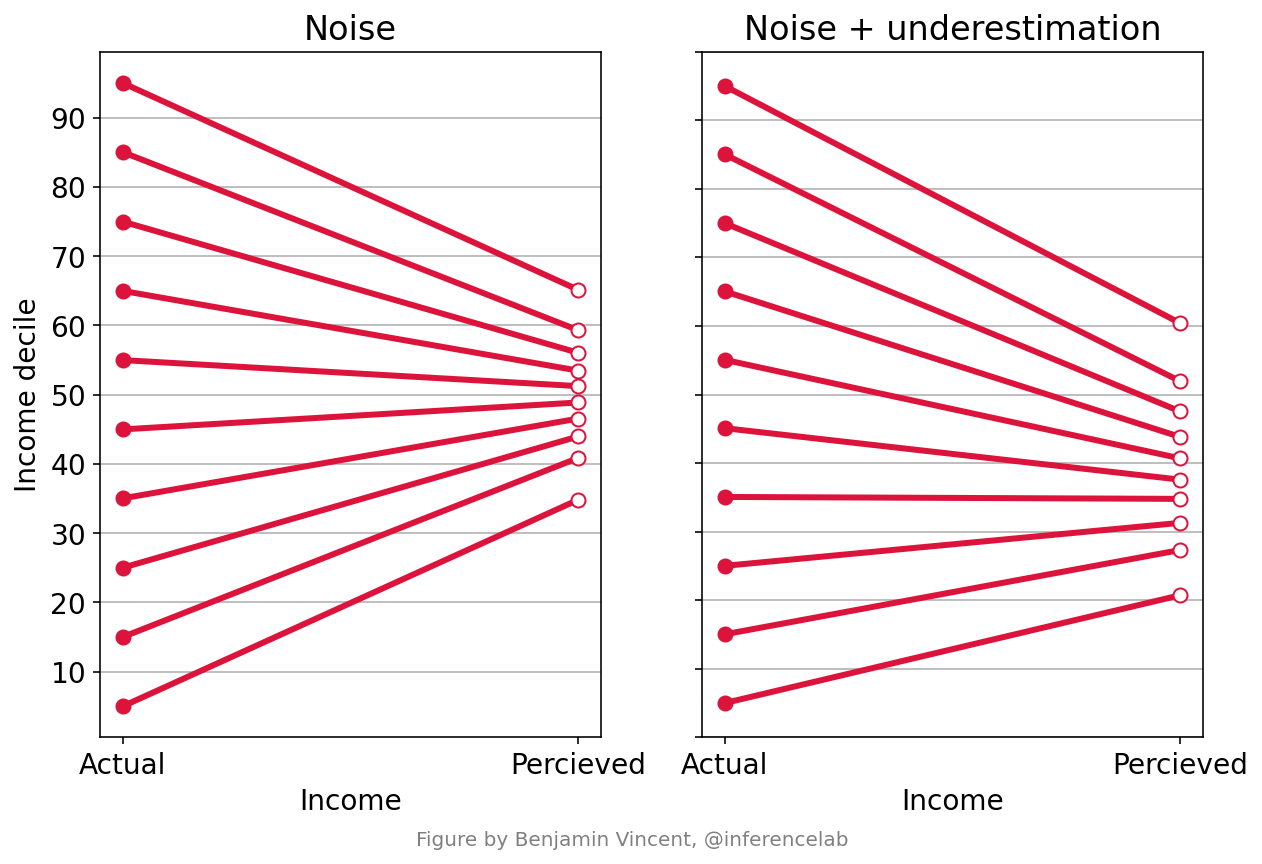

In [6]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 6), sharey=True)

# NOISE ONLY MODEL =======================================
x, o, s, q = generate_data(bias=0, σo=1.5, σs=1.5)

# normalise to uniform over 0-100 scale
s = norm.cdf(s / np.std(s)) * 100
o = norm.cdf(o / np.std(o)) * 100

# Calculate means for each quartile
s_mean = [np.mean(s[q == group]) for group in groups]
o_mean = [np.mean(o[q == group]) for group in groups]
plot(ax[0], title="Noise")
ax[0].set(ylabel="Income decile")

# NOISE + BIAS MODEL =====================================
x, o, s, q = generate_data(bias=-0.5, σo=1.5, σs=1.5)

# normalise to uniform over 0-100 scale
s = norm.cdf(s / np.std(s)) * 100
o = norm.cdf(o / np.std(o)) * 100

# Calculate means for each quartile
s_mean = [np.median(s[q == group]) for group in groups]
o_mean = [np.median(o[q == group]) for group in groups]
ax[1] = plot(ax[1], title="Noise + underestimation")

# Polish off figure formatting
plt.figtext(
    0.5,
    0,
    "Figure by Benjamin Vincent, @inferencelab",
    ha="center",
    fontsize=10,
    fontdict={"color": "grey"},
)

fig.tight_layout()

## Summary
The figure on the left shows the results of a noise only model. Here, actual income is a noisy measure of people's true income and percieved income is a person's noisy estimate of their own income. We can see that _one_ of the basic features of the results is captured, namely this [regression toward the mean](https://en.wikipedia.org/wiki/Regression_toward_the_mean) type effect.

However, there is another important feature of the income perception data in that there is a downwards trend. This aspect of the data is captured by the 'noise + underestimation' model shown on the right. This model basically states that people's estimates of their place in the income distribution are noisy _and_ that _everyone_ underestimates their income.

So the immediately appealing interpretation of the data, made in the Dunning-Kruger effect, and in the income perception study, is that people high on the scale underestimate and people low on the scale overestimate.

But the 'noise + underestimation' model shows that the core features of the data can be explained by people having uncertainty about where they are in the income distribution _and_ that _everybody_ underestimates where they are in the income distribution.

So what are the take home messages?
- It might _look_ like rich people underestimate their income and that poor people overestimate their income.
- But if you simulate a world where everyone has uncertainty about their income and where _everyone_ underestimates their income, then you can get results like what were reported in the study.

How crazy is that?!

### Typical academic caveats
- You could imagine a more complex noise + bias model where bias varies as a function of true income. This kind of model would be able to capture the initial proposal (rich people underestimate, poor people overestimate). I am not claiming that that model is not 'true' - but to make a convincing argument for that model, you would have to quantitatively compare all of these models and find that the more complex model fits the data better even after accounting for model complexity.